In [1]:
experiment_ids = 'A1 A2 A3 A4 A5 A6 A7 A8 A9 B1 B10 B11 B12 B13 B14 B15 B16 B17 B18 B19 B2 B20 B21 B22 B23 B25 B26 B27 B29 B3 B30 B31 B32 B33 B34 B35 B36 B37 B38 B39 B4 B40 B41 B42 B43 B44 B45 B47 B48 B49 B5 B50 B51 B53 B54 B6 B7 B8 B9 sc1 sc10 sc11 sc12 sc13 sc14 sc15 sc16 sc17 sc18 sc19 sc2 sc20 sc21 sc22 sc23 sc24 sc25 sc26 sc27 sc28 sc29 sc32 sc34 sc35 sc36 sc4 sc7 sc9'.split()

# Robustness analysis

In [2]:
import glob

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from basic_utils import *

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [3]:
df_robustness = pd.read_csv("../TABLES/robustness_analysis_noadd.txt")

In [77]:
df_mean = df_robustness.groupby(['exp', 'len_idxfa_selected']).mean().reset_index()
df_std = df_robustness.groupby(['exp', 'len_idxfa_selected']).std().reset_index()
df_robustness_processed = {'exp':[], 'means_x':[], 'means_y':[], 'stds_y':[], 'pred_y':[], 'mode':[], 'len_idxfa':[]}

for exp in experiment_ids:
    means_x = df_mean.query('exp=="{}"'.format(exp))['len_idxfa_selected'].values
    means_y = df_mean.query('exp=="{}"'.format(exp))['04_unique_contacts'].values
    stds_y = df_std.query('exp=="{}"'.format(exp))['04_unique_contacts'].values
    
        
    step = means_x[1]-means_x[0]
    new_x = np.arange(np.max(means_x), np.max(means_x)*2+step, step)[1:]

    x = np.concatenate([means_x, new_x])
    y = np.concatenate([means_y, [np.nan]*len(new_x)])
    std_y = np.concatenate([stds_y, [np.nan]*len(new_x)])


    df_robustness_processed['means_x'] += list(x)
    df_robustness_processed['means_y'] += list(y)
    df_robustness_processed['stds_y'] += list(std_y)
    df_robustness_processed['exp'] += list([exp]*len(x))
    df_robustness_processed['len_idxfa'] += list([df_mean.query('exp=="{}"'.format(exp))['len_idxfa'].values]*len(x))
    
    a, b, c = np.polyfit(np.log(means_x), means_y, 2)
    y_pred = a*np.log(x)*np.log(x)+b*np.log(x)+c
    df_robustness_processed['pred_y'] += list(y_pred)

    df_robustness_processed['mode'] += \
      list(['observation']*(len(means_x)-1) + ['observation_max'] + ['prediction']*(len(new_x)-1) + ['prediction_max'])
        
df_robustness_processed = pd.DataFrame(df_robustness_processed)

In [104]:
df_robustness_processed.to_excel("../TABLES/1_robustness_prediction.xlsx")

DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = '/home/agalicina/anaconda3/envs/sci-python3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'


64


DEBUG:matplotlib.backends.backend_pdf:Embedding font /home/agalicina/anaconda3/envs/sci-python3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG:matplotlib.backends.backend_pdf:Writing TrueType font.


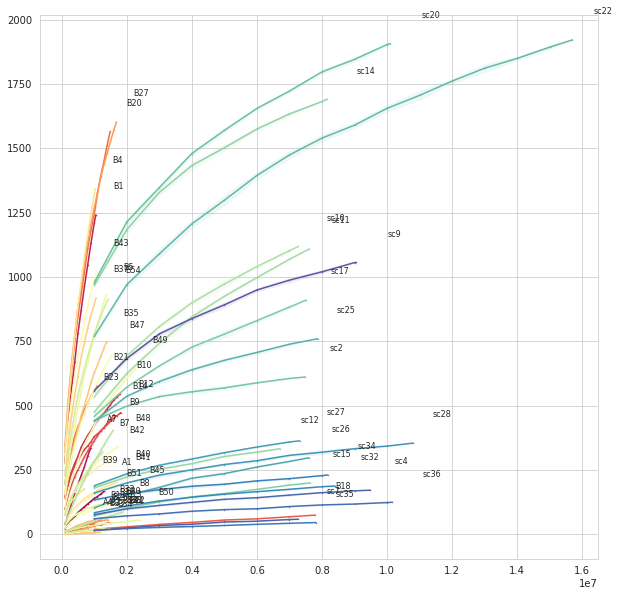

In [96]:
sns.set_palette('Spectral', #len(experiment_ids))

plt.figure(figsize=[10,10])

for exp in experiment_ids:
    df_tmp = df_robustness_processed.query('exp=="{}"'.format(exp))
    means_x, means_y, stds_y = df_tmp.means_x, df_tmp.means_y, df_tmp.stds_y
    mx_x, mx_y = np.nanmax(means_x)/2, np.nanmax(means_y)
    #if mx_y<3000:
    #    continue
    plt.plot(means_x, means_y, label=exp, marker='.', markersize=1)
    plt.fill_between(means_x, means_y-stds_y, means_y+stds_y, alpha=.1)
    plt.text(mx_x+5e5, mx_y+100, exp, fontsize=8)

#plt.legend()

#plt.savefig("../IMG/QC/1_robustness_less2000_nopred.pdf")
plt.savefig("../IMG/QC/1_robustness_all_nopred.pdf")

DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = '/home/agalicina/anaconda3/envs/sci-python3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG:matplotlib.backends.backend_pdf:Embedding font /home/agalicina/anaconda3/envs/sci-python3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG:matplotlib.backends.backend_pdf:Writing TrueType font.


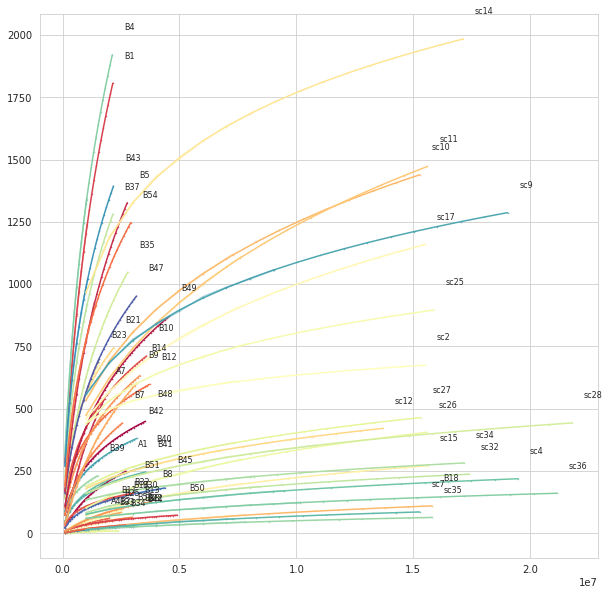

In [103]:
sns.set_palette('Spectral', 64)#, len(experiment_ids))

plt.figure(figsize=[10,10])

for exp in experiment_ids:
    df_tmp = df_robustness_processed.query('exp=="{}"'.format(exp))
    means_x, means_y, stds_y, pred_y = df_tmp.means_x, df_tmp.means_y, df_tmp.stds_y, df_tmp.pred_y
    mx_x, mx_y = np.nanmax(means_x), np.nanmax(pred_y)
    if mx_y>=2000:
        continue
    plt.plot(means_x, pred_y, label=exp, marker='.', markersize=1)
    plt.plot(means_x, means_y, label=exp, marker='.', markersize=1, alpha=0.5)
    plt.text(mx_x+5e5, mx_y+100, exp, fontsize=8)
    
plt.savefig("../IMG/QC/1_robustness_less2000_pred.pdf")

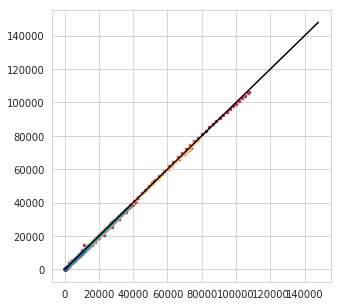

In [86]:
sns.set_palette('Spectral', len(experiment_ids))

plt.figure(figsize=[5,5])

for exp in experiment_ids:
    df_tmp = df_robustness_processed.query('exp=="{}"'.format(exp))
    means_x, means_y, stds_y, pred_y = df_tmp.means_x, df_tmp.means_y, df_tmp.stds_y, df_tmp.pred_y
    plt.plot(means_y, pred_y, label=exp, marker='.', markersize=5, lw=0)
#plt.legend()
plt.plot([0,np.max(df_robustness_processed.pred_y)], [0,np.max(df_robustness_processed.pred_y)], color='black')

In [80]:
def retrieve_enrichment(x):
    max_pred = x.loc[x['mode']=='prediction_max', 'pred_y'].values[0]
    max_obs = x.loc[x['mode']=='observation_max', 'means_y'].values[0]
    return pd.DataFrame({'obtained_contacts':[max_obs], 
                         'prediction':[max_pred], 
                         'enrichment':[max_pred-max_obs],
                        'enrichment>2000':[max_pred-max_obs>2000],
                        'prc_enrichment':[100*(max_pred-max_obs)/max_obs],
                        'raw_reads':[x['len_idxfa'].values[0][0]]})

df_experiments_selection = df_robustness_processed.groupby('exp').apply(retrieve_enrichment).sort_values('enrichment', ascending=False).reset_index().drop('level_1', axis=1)

In [82]:
df_experiments_selection.head(25)

,exp,obtained_contacts,prediction,enrichment,enrichment>2000,prc_enrichment,selected,raw_reads
0,A6,107823.0,147972.469396,40149.469396,True,37.236461,True,36489644.0
1,A8,73691.0,99860.444908,26169.444908,True,35.512403,True,28858752.0
2,B31,77770.0,98835.976615,21065.976615,True,27.087536,True,49373363.0
3,A5,41439.0,56002.695480,14563.695480,True,35.144901,True,49694438.0
4,B16,38019.0,49214.942731,11195.942731,True,29.448283,True,49520139.0
5,sc23,38174.0,48687.350963,10513.350963,True,27.540606,True,42783743.0
6,B26,35420.0,45054.067043,9634.067043,True,27.199512,True,43542706.0
7,B19,30620.0,39165.323889,8545.323889,True,27.907655,True,39148111.0
8,A3,27215.0,35449.813278,8234.813278,True,30.258362,True,71708671.0
9,A2,25483.0,33416.614125,7933.614125,True,31.132968,True,46100256.0


In [85]:
df_experiments_selection.to_excel("../TABLES/1_robustness_selection.xlsx")

## Scalings

In [8]:
experiment_ids_selected = 'A6 B31 A8 A5 sc23 B26 B19 B16 sc16 B3 A2 A3 sc1 B6 A9 sc24 sc29 sc19 sc21 B15'.split()

In [105]:
# Create merged cells for detection of non-covered bins
PATH_COOL = '../DATA/COOL/'
for resolution in [100, 20, 10, 1]:
    print(resolution)
    files = list(map(lambda x: PATH_COOL + x + ".{}.cool".format(resolution), experiment_ids_selected))
    output = PATH_COOL + "merged_cell.{}.cool".format(resolution)
    merge_single_cells(output, files=files)

In [115]:
resolution = 1

In [106]:
labels = experiment_ids_selected
population_file  = PATH_COOL + "Dros.{}.cool.full".format(resolution*1000)
merged_file      = PATH_COOL + "merged_cell.{}.cool".format(resolution)
files            = list(map(lambda x: PATH_COOL + x + ".{}.cool".format(resolution), experiment_ids_selected))


df_scalings = pd.concat([
    get_scalings_df(files, labels, merged_file=merged_file, scaleType='log', logFactor=1.15),
    get_scalings_df([merged_file], ['merged'], merged_file=merged_file, scaleType='log', logFactor=1.15),
    get_scalings_df([population_file], ['population'], merged_file=population_file, scaleType='log', logFactor=1.15)
])

df_scalings.loc[:,'Pc_norm'] = df_scalings.apply(
    lambda x: 1000*x.Pc/list(df_scalings.query("label=='{}'&mids==2.5".format(x.label)).Pc)[0],
    axis=1
)
df_scalings.loc[:,'mids_bp'] = resolution*1000*df_scalings.loc[:,'mids']


df_scalings_X = pd.concat([
    get_scalings_df(files, labels, merged_file=merged_file, chromosomes=['chrX'],  scaleType='log', logFactor=1.15),
    get_scalings_df([merged_file], ['merged'], merged_file=merged_file, chromosomes=['chrX'], scaleType='log', logFactor=1.15),
    get_scalings_df([population_file], ['population'], merged_file=population_file, chromosomes=['chrX'], scaleType='log', logFactor=1.15)
])

df_scalings_X.loc[:,'Pc_norm'] = df_scalings_X.apply(
    lambda x: 1000*x.Pc/list(df_scalings_X.query("label=='{}'&mids==2.5".format(x.label)).Pc)[0],
    axis=1
)
df_scalings_X.loc[:,'mids_bp'] = resolution*1000*df_scalings.loc[:,'mids']
df_scalings.to_csv('../DATA/TMP/df_scalings_1Kb.txt')
df_scalings_X.to_csv('../DATA/TMP/df_scalings_X_1Kb.txt')


In [4]:
# df_scalings = pd.read_csv('../DATA/TMP/df_scalings_1Kb.txt')
# df_scalings_X = pd.read_csv('../DATA/TMP/df_scalings_X_1Kb.txt')

In [5]:
%load_ext rpy2.ipython
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [8]:
df_control_1 = pd.DataFrame({'mids_bp':df_scalings.loc[:,'mids_bp'], 
                             'Pc_norm':1000*(df_scalings.loc[:,'mids_bp']**(-1))/((2.5*resolution*1000)**(-1))})

df_control_15 = pd.DataFrame({'mids_bp':df_scalings.loc[:,'mids_bp'], 
                             'Pc_norm':1000*(df_scalings.loc[:,'mids_bp']**(-1.5))/((2.5*resolution*1000)**(-1.5))})

In [107]:
%%R -i df_scalings -i df_control_15 -i df_control_1 
mn = min(df_scalings['mids_bp'])
mx = max(df_scalings['mids_bp'])
p <- ggplot(data=df_scalings, aes(x=mids_bp, y=Pc_norm, color=label)) +
    geom_line(size=0.9, alpha=0.5) + scale_fill_hue(l=40) + 
    geom_line(color='#585858', size=1.5, alpha=0.7, data=df_sc_merged,  mapping=aes(x=mids_bp, y=Pc_norm)) +
    geom_line(color='black',   size=1.5, alpha=0.7, data=df_sc_population,  mapping=aes(x=mids_bp, y=Pc_norm)) +
    geom_line(linetype='dashed', color='black', size=0.5, alpha=0.7, data=df_control_15, mapping=aes(x=mids_bp, y=Pc_norm)) +
    geom_line(linetype='dashed', color='black', size=0.5, alpha=0.7, data=df_control_1, mapping=aes(x=mids_bp, y=Pc_norm)) +
    theme_bw() +
    scale_x_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
    ) +
    scale_y_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
    ) + annotation_logticks()  

plot(p)

ggsave(p, file="../IMG/QC/02_scalings.png", width=10, height=8)

In [ ]:
%%R -i df_scalings_X -i df_control_15 -i df_control_1 
mn = min(df_scalings_X['mids_bp'])
mx = max(df_all['mids_bp'])
p <- ggplot(data=df_scalings_X, aes(x=mids_bp, y=Pc_norm, color=label)) +
    geom_line(size=0.9, alpha=0.5) + scale_fill_hue(l=40) + 
    #geom_line(color='#585858', size=1.5, alpha=0.7, data=df_sc_merged_X,  mapping=aes(x=mids_bp, y=Pc_norm)) +
    #geom_line(color='black', size=1.5,   alpha=0.7, data=df_sc_population_X,  mapping=aes(x=mids_bp, y=Pc_norm)) +
    geom_line(linetype='dashed', color='black', size=0.5, alpha=0.7, data=df_control_15, mapping=aes(x=mids_bp, y=Pc_norm)) +
    geom_line(linetype='dashed', color='black', size=0.5, alpha=0.7, data=df_control_1, mapping=aes(x=mids_bp, y=Pc_norm)) +
    theme_bw() +
    scale_x_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
    ) +
    scale_y_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
    ) + annotation_logticks()  

plot(p)

ggsave(p, file="../IMG/QC/02_scalings.png", width=10, height=8)

## Statistics collection

In [1]:
from sys import argv
import glob
from basic_utils import *

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

rfrags_total = 332981 # Drosophila

def filter_df_mild(df, rfrags_total=332981):
    """
    Mild filtering: removal of rfrag1==rfrag2 (mirror reads), 
    duplicated contacts (contact of the same pair of restriction fragments in the same orientation). 
    Default rfragms number is for Drosophila. 
    
    """
    
    df = df.copy()
    
    df['rfrag_code_pair'] = df.rfrag1.values*rfrags_total + df.rfrag2.values 
    df['rfrag1_directed'] = df.rfrag1.values*10 + (df.strand1.values=='+')
    df['rfrag2_directed'] = df.rfrag2.values*10 + (df.strand2.values=='-')
    df['rfrag_code_pair_directed'] = df.rfrag1_directed.values*rfrags_total*10 + df.rfrag2_directed.values

    stats = {}

    N = len(df)
    logging.info("Initial size: {}".format(N))


    df = df.query('rfrag1!=rfrag2')
    logging.info("Mirrors filtered: {}".format(N-len(df)))
    stats['01_mirrors'] = N-len(df)
    N = len(df)

    df = df.drop_duplicates('rfrag_code_pair_directed')
    logging.info("Duplicates filtered: {}".format(N-len(df)))
    stats['02_duplicates'] = N-len(df)
    N = len(df)
    
    return df

def get_counts(df, limit=(2688850, 3329431)): 
    """
    Counting each restriction fragment in contacts dataframe.
    Default limit is for chrX of Drosophila (2688850, 3329431).
    """
    
    target_vector = np.concatenate([df.rfrag1_directed.values.astype(np.int64), df.rfrag2_directed.values.astype(np.int64)])
    target_vector = target_vector[target_vector>=0]
    if limit is None:
        v = np.bincount(target_vector)
    else:
        v = np.bincount(target_vector[(target_vector>=limit[0])&(target_vector<=limit[1])])
    
    return v

def get_counts_sum(df, limit=(2688850, 3329431)):
    """
    Counting each restriction fragments and retrieving number of contacts from restriction fragments with more than 4 unique contacts
    (i.e. unexpected and artifact cases)
    """
    
    target_vector = np.concatenate([df.rfrag1_directed.values.astype(np.int64), df.rfrag2_directed.values.astype(np.int64)])
    target_vector = target_vector[target_vector>=0]
    if limit is None:
        v = np.bincount(target_vector)
    else:
        v = np.bincount(target_vector[(target_vector>=limit[0])&(target_vector<=limit[1])])

    return(sum(v[v>4]))


def calculate_stats(x):
    v = x.counts
    ret = {}
    
    ret.update({'#contacts'     : [v.sum()]})
    ret.update({'#contacts(>4)' : [v[v>4].sum()]})
    ret.update({'#contacts(<=4)' : [v[(v<=4)&(v>0)].sum()]})

    ret.update({'#rfrags'     : [(v>0).sum()]})
    ret.update({'#rfrags(>4)' : [(v>4).sum()]})
    ret.update({'#rfrags(<=4)' : [((v<=4)&(v>0)).sum()]})
    
    ret.update({'max_count': np.max(v)})
    ret.update({'mean_count': np.mean(v)})
    ret.update({'median_count': np.median(v)})
    ret.update({'95percentile_count': np.percentile(v, 95)})
    
    return pd.DataFrame(ret)

DEBUG:matplotlib:CACHEDIR=/home/agalicina/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/agalicina/.cache/matplotlib/fontList.json
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


INFO:root:Initial size: 355
INFO:root:Mirrors filtered: 13
INFO:root:Duplicates filtered: 175
INFO:root:Filtering rfrags rfrag_ends_count: 0
INFO:root:Resulting size: 167
INFO:root:Initial size: 355
INFO:root:Mirrors filtered: 13
INFO:root:Duplicates filtered: 175
INFO:root:Initial size: 3707
INFO:root:Mirrors filtered: 2742
INFO:root:Duplicates filtered: 365
INFO:root:Initial size: 3153824
INFO:root:Mirrors filtered: 110331
INFO:root:Duplicates filtered: 3017781
INFO:root:Filtering rfrags rfrag_ends_count: 229
INFO:root:Resulting size: 25483
INFO:root:Initial size: 3153824
INFO:root:Mirrors filtered: 110331
INFO:root:Duplicates filtered: 3017781
INFO:root:Initial size: 33345933
INFO:root:Mirrors filtered: 22791604
INFO:root:Duplicates filtered: 10374696


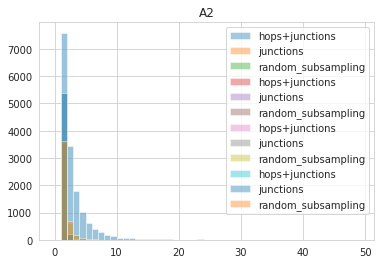

In [6]:
resolution = 10

PAIR_PATH = "../DATA/PAIR/"
df_total = pd.DataFrame()

for exp in experiment_ids_selected[:2]:

    cell = exp
    
    # Reading datasets
    filelist = glob.glob(PAIR_PATH+"{}_*.pairsam.JJ".format(exp))
    exp_list = [x.split('/')[-1].split('.')[0] for x in filelist]
    df = read_pairsams(filelist, exp_list, cell, filter_type='JJ')

    filelist = glob.glob(PAIR_PATH+"{}_*.pairsam.PP".format(exp))
    exp_list = [x.split('/')[-1].split('.')[0] for x in filelist]
    df_PP = read_pairsams(filelist, exp_list, cell, filter_type='PP')

    df_PPJJ = pd.concat([df, df_PP])
    
    #Filtering datasets
    df_filtered, stats = filter_pair_df(df)

    df_f = filter_df_mild(df)
    df_PPJJ_f = filter_df_mild(df_PPJJ)

    
    # Counting distribuions of rfrags
    for limit, mode in [[(2688850, 3329431), 'chrX'],
                       [None, 'all']]:
                        
        v_raw = get_counts(df_PPJJ_f, limit=limit)
        v_filt = get_counts(df_f, limit=limit)

        plt.figure(figsize=[5,4])
        sns.distplot(v_raw[v_raw>0], kde=False, bins=np.arange(0,50,1), label='hops+junctions')
        sns.distplot(v_filt[v_filt>0], kde=False, bins=np.arange(0,50,1), label='junctions')

        idx_selected = np.random.choice(np.arange(len(df_PPJJ_f)), len(df_f), replace=False)
        v = get_counts(df_PPJJ_f.iloc[idx_selected,:])
        sns.distplot(v[v>0], kde=False, bins=np.arange(0,50,1), label='random_subsampling')

        plt.legend()
        plt.title(exp)
        #plt.savefig("../IMG/QC/1C_perFragEndDistr_{}_{}.pdf".format(exp, mode))
    

        df1 = pd.DataFrame(columns=['mode', 'counts', 'rand_mode'])

        v = get_counts(df_PPJJ_f, limit=limit)
        toadd = v[v>0]
        df1_tmp = pd.DataFrame(index=np.arange(len(toadd)), columns=['mode', 'counts', 'rand_mode'])
        df1_tmp.loc[:, 'counts'] = toadd
        df1_tmp.loc[:, 'mode'] = 'junctions+hops'
        df1_tmp.loc[:, 'randmode'] = 'real'
        df1 = pd.concat([df1, df1_tmp])

        v = get_counts(df_f, limit=limit)
        toadd = v[v>0]
        df1_tmp = pd.DataFrame(index=np.arange(len(toadd)), columns=['mode', 'counts', 'rand_mode'])
        df1_tmp.loc[:, 'counts'] = toadd
        df1_tmp.loc[:, 'mode'] = 'junctions'
        df1_tmp.loc[:, 'randmode'] = 'real'
        df1 = pd.concat([df1, df1_tmp])

        for i in range(10):
            idx_selected = np.random.choice(np.arange(len(df_PPJJ_f)), len(df_f), replace=False)
            v = get_counts(df_PPJJ_f.iloc[idx_selected,:])

            toadd = v[v>0]
            df1_tmp = pd.DataFrame(index=np.arange(len(toadd)), columns=['mode', 'counts', 'rand_mode'])
            df1_tmp.loc[:, 'counts'] = toadd
            df1_tmp.loc[:, 'mode'] = 'random_{}'.format(i)
            df1_tmp.loc[:, 'randmode'] = 'random'
            df1 = pd.concat([df1, df1_tmp])

            df1 = pd.concat([df1, df1_tmp])

        df1.counts = pd.to_numeric(df1.counts)

        df_stats = df1.groupby('limit_mode').apply(calculate_stats).reset_index()
        df_stats.loc['mode'] = mode
        df_stats.loc['exp'] = exp
        
        df_total = pd.concat([df_total, df_stats])

#df_total.to_csv("../TABLES/1D_collected_stats.csv")

In [19]:
experiment_ids_fl = np.unique([x.split('/')[-1].split('_')[0] for x in glob.glob("../DATA_FL/FASTQ/o*R1*")])

INFO:root:Initial size: 865330
INFO:root:Mirrors filtered: 116203
INFO:root:Duplicates filtered: 608290
INFO:root:Filtering rfrags rfrag_ends_count: 878
INFO:root:Resulting size: 139959
INFO:root:Initial size: 865330
INFO:root:Mirrors filtered: 116203
INFO:root:Duplicates filtered: 608290
INFO:root:Initial size: 14287488
INFO:root:Mirrors filtered: 9062075
INFO:root:Duplicates filtered: 4253269
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = '/home/agalicina/anaconda3/envs/sci-python3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG:matplotlib.backends.backend_pdf:Embedding font /home/agalicina/anaconda3/envs/sci-python3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG:matplotlib.backends.backend_pdf:Writing TrueType font.
INFO:root:Initial size: 7034956
INFO:root:Mirrors filtered: 387536
INFO:root:Duplicates filtered: 5805850
INFO:root:Filtering rfrags rfrag_ends_count: 5746
INFO:root:Resulting size: 835824
IN

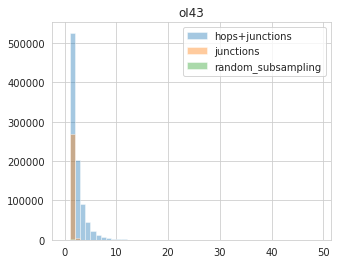

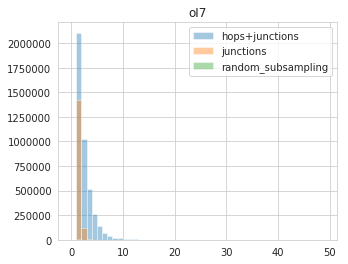

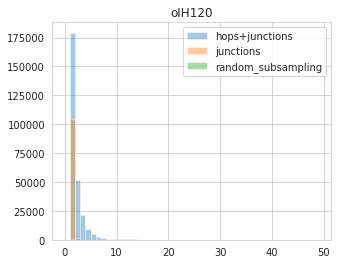

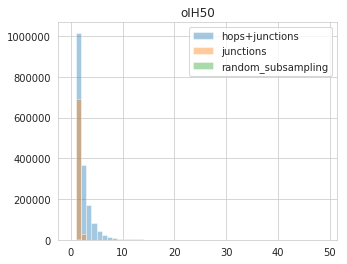

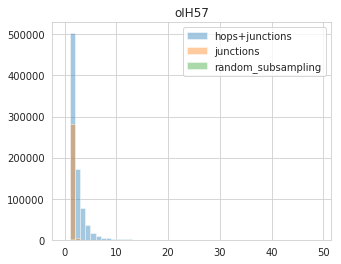

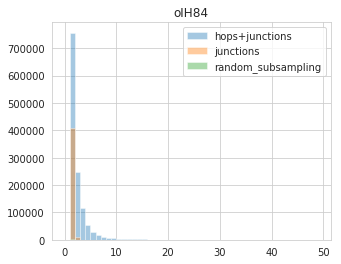

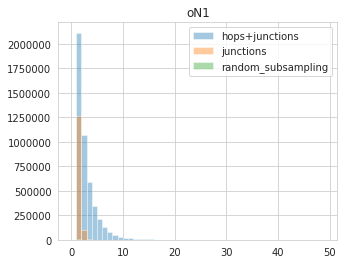

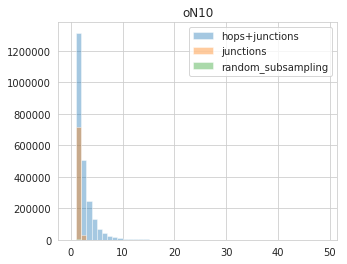

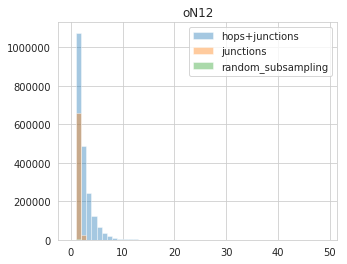

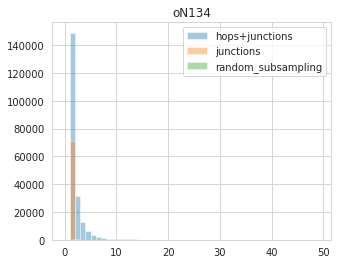

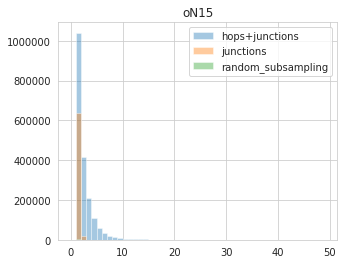

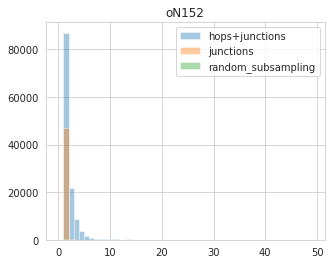

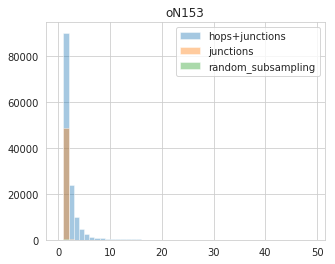

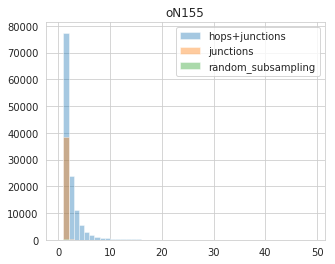

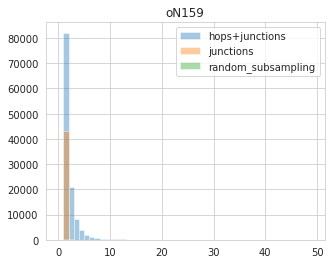

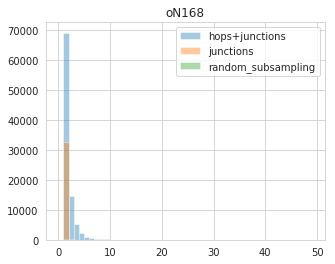

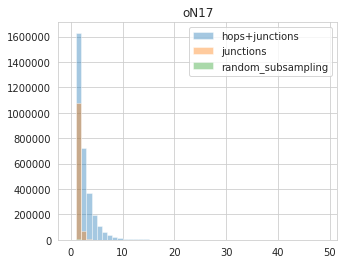

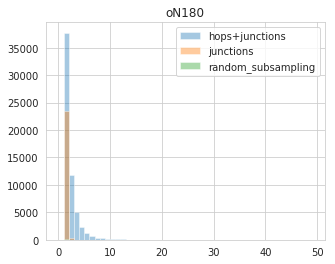

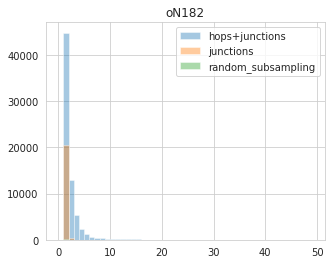

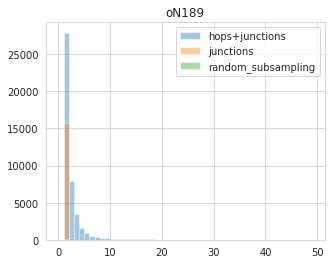

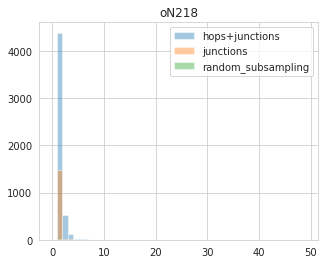

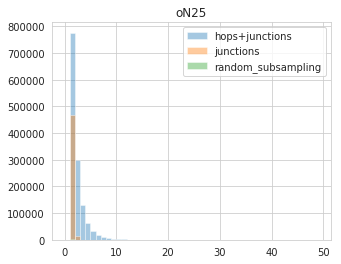

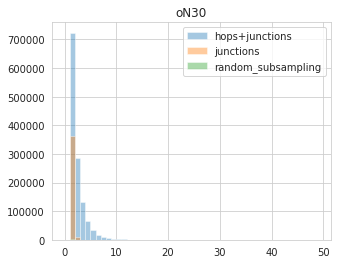

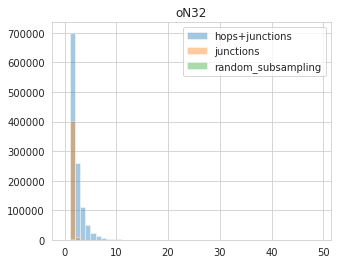

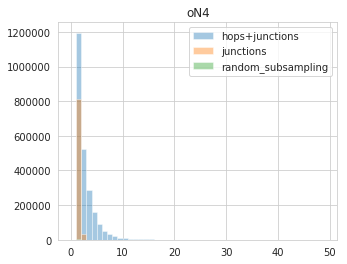

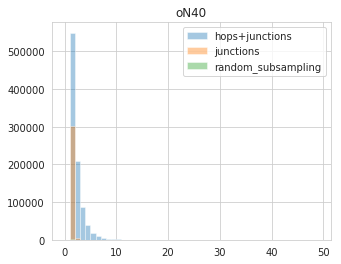

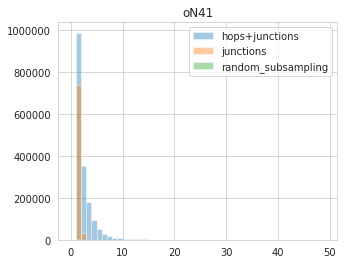

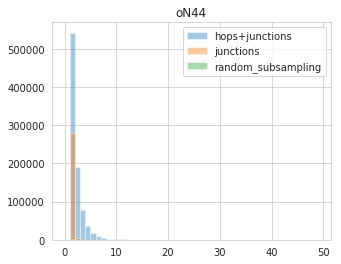

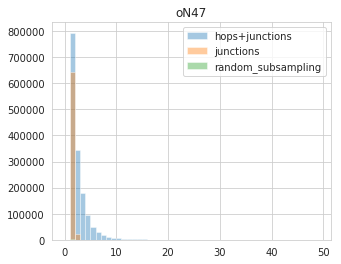

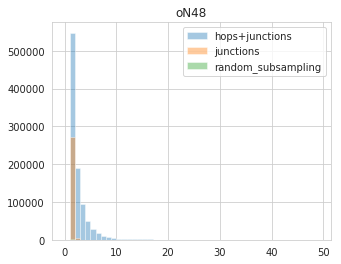

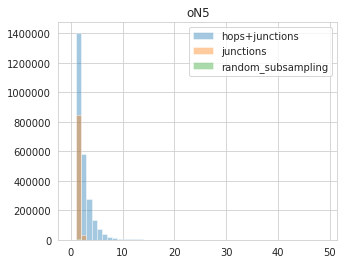

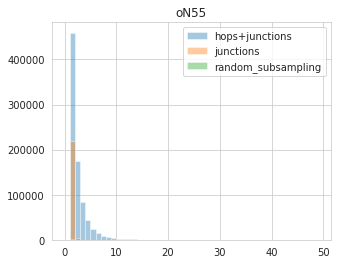

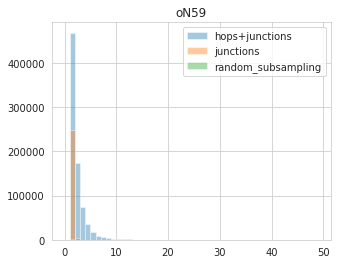

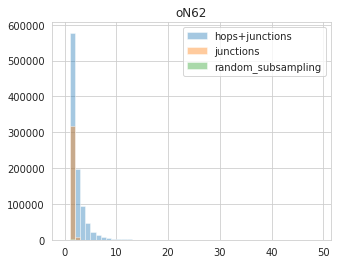

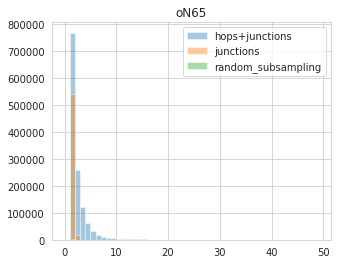

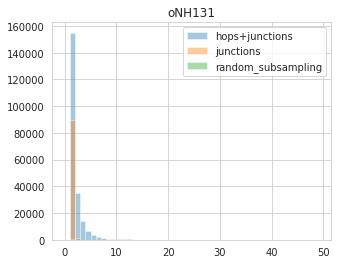

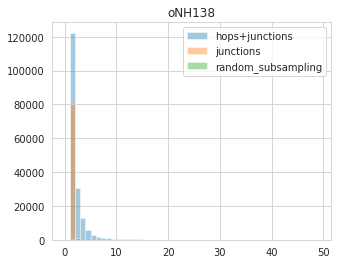

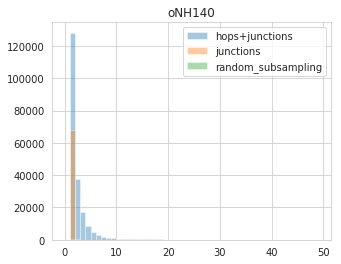

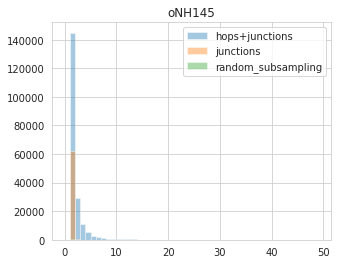

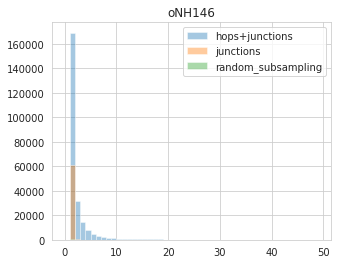

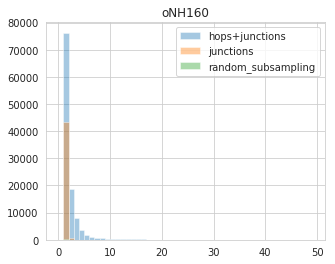

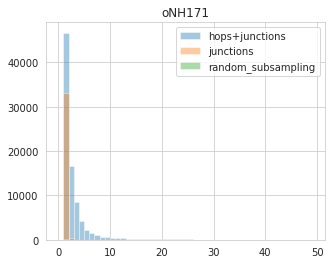

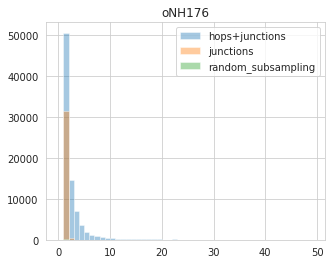

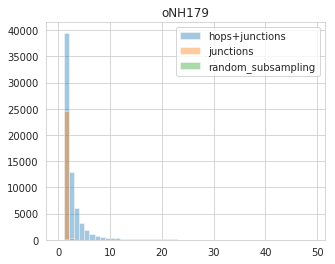

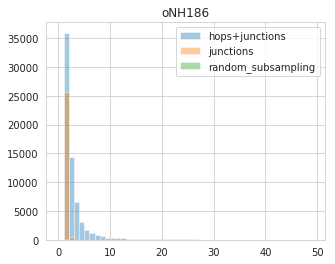

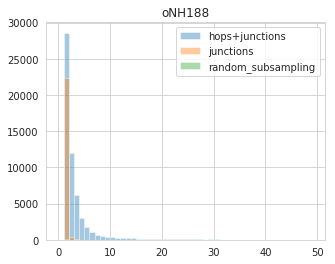

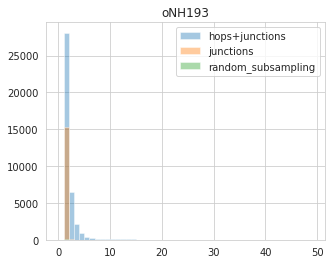

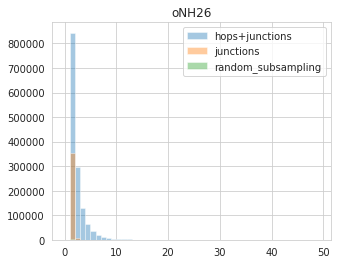

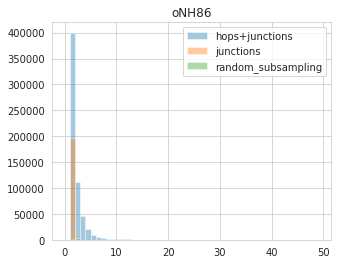

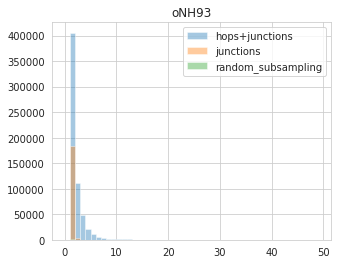

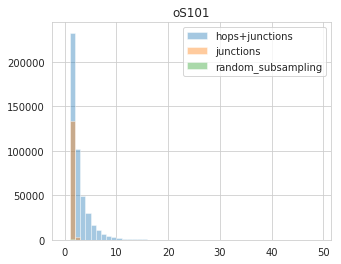

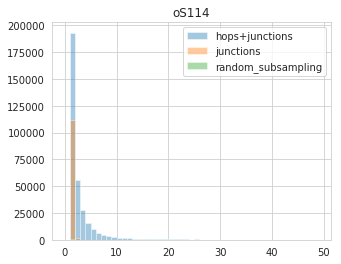

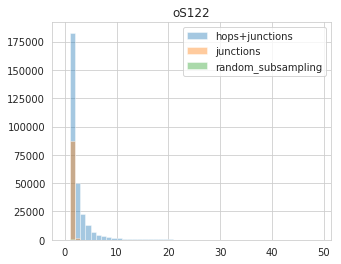

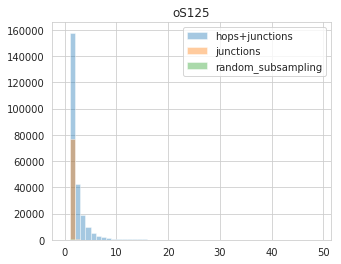

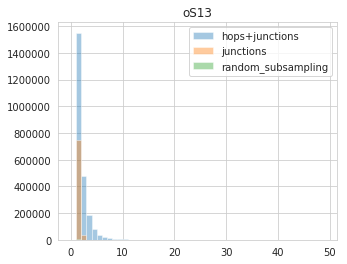

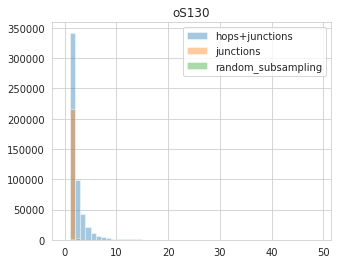

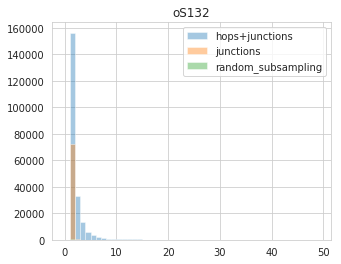

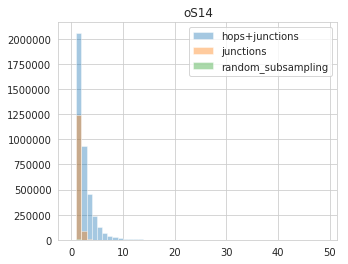

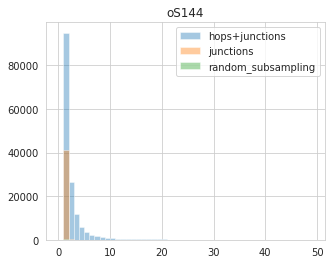

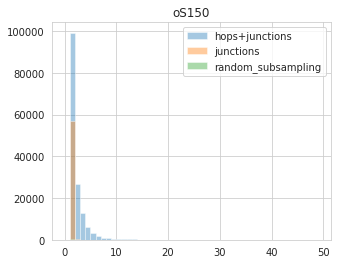

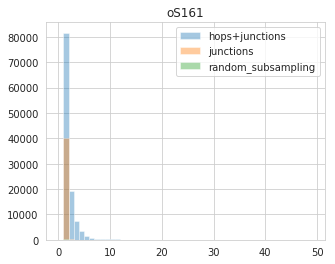

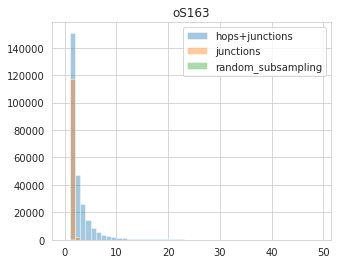

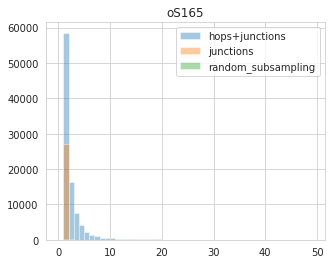

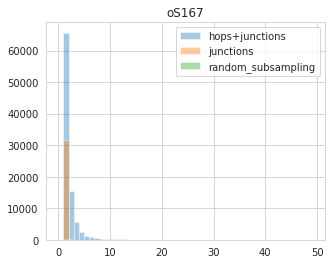

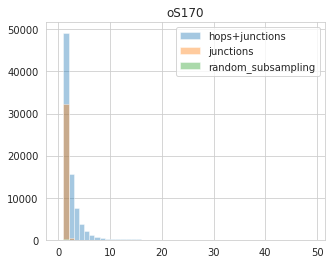

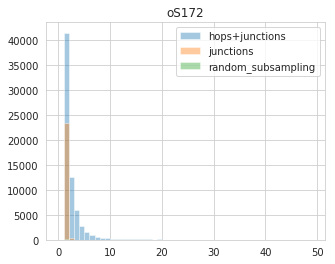

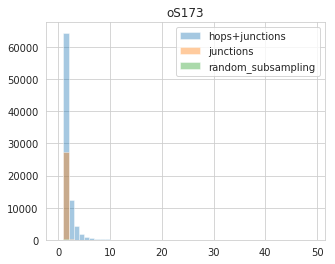

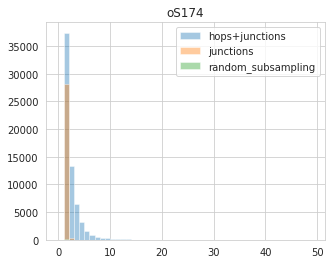

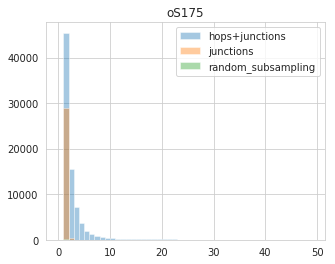

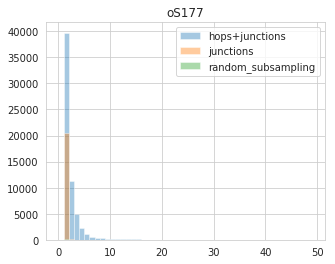

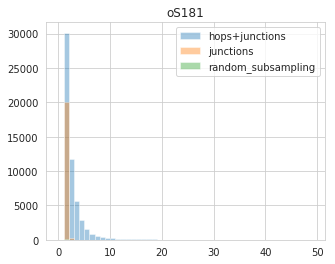

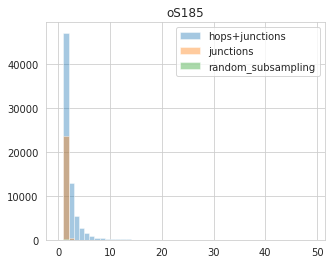

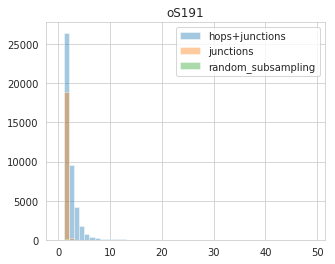

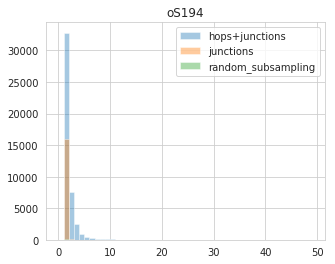

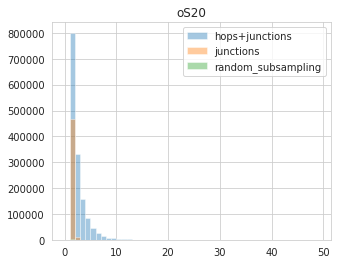

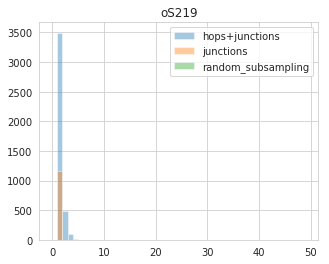

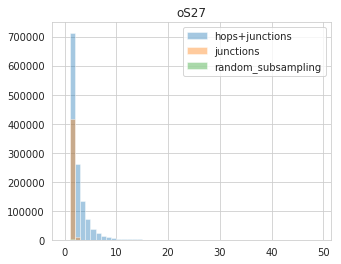

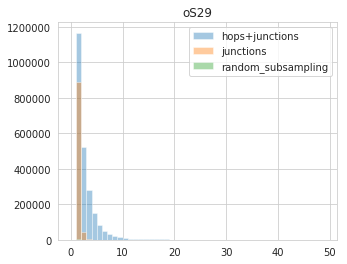

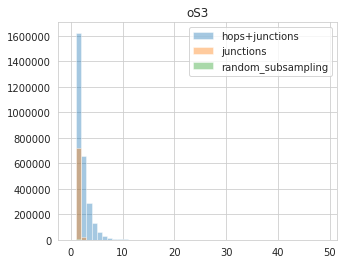

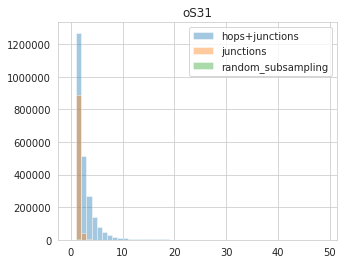

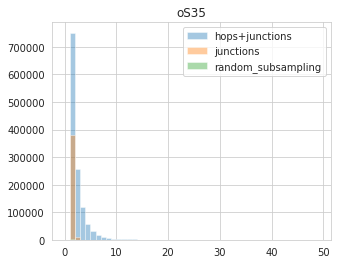

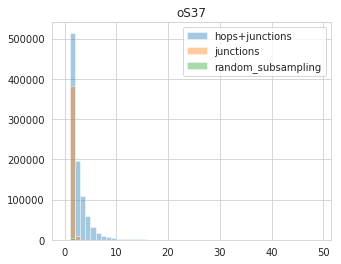

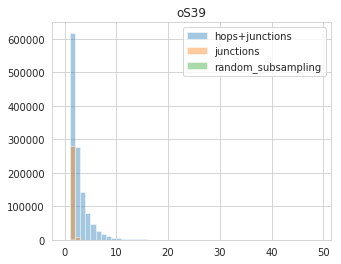

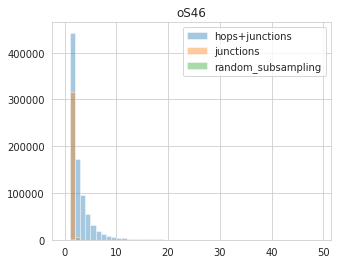

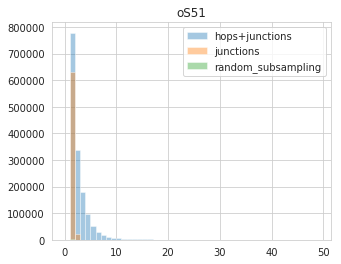

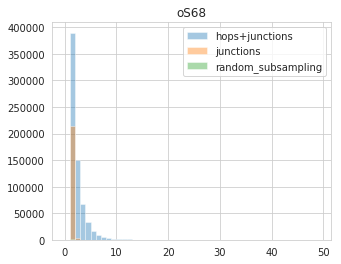

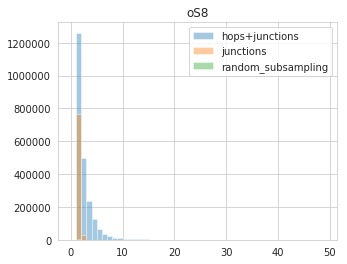

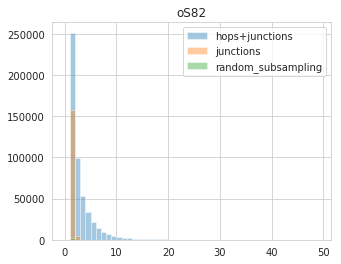

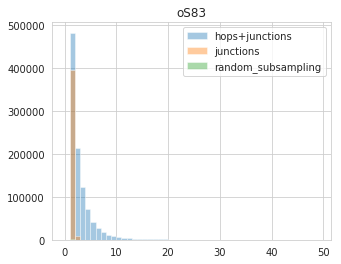

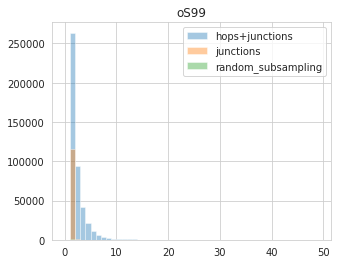

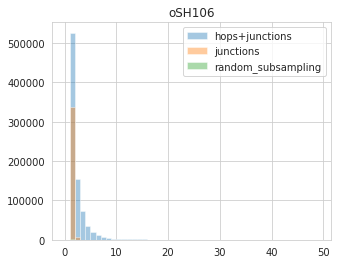

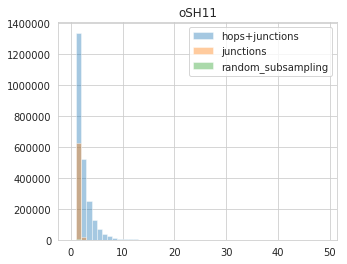

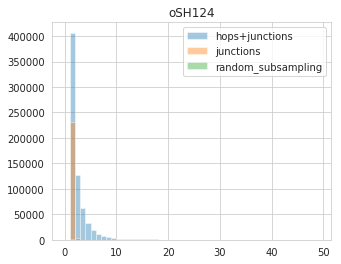

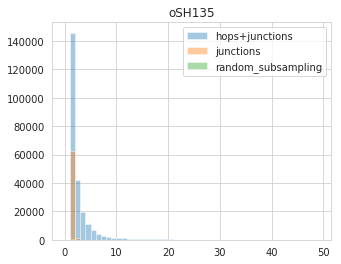

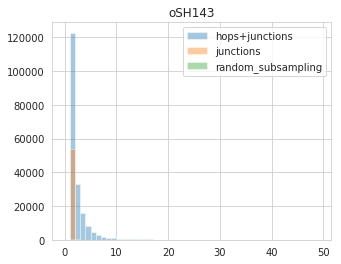

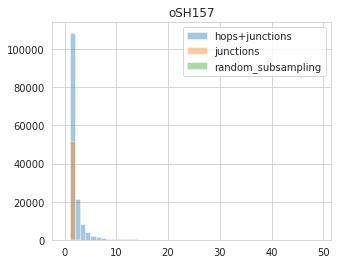

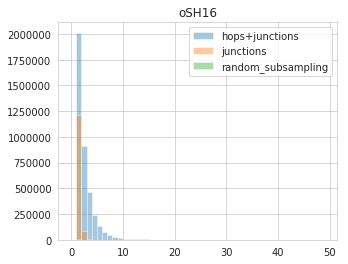

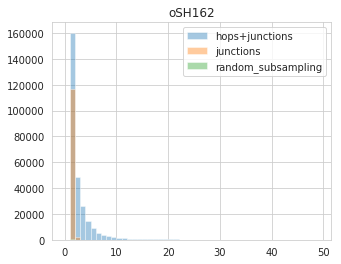

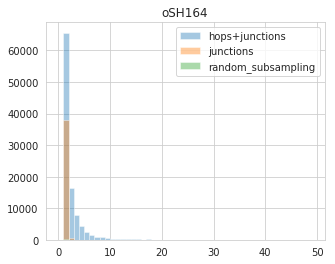

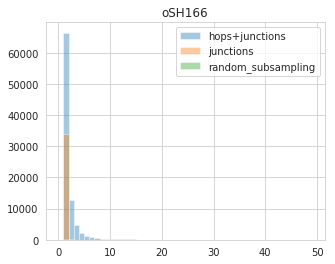

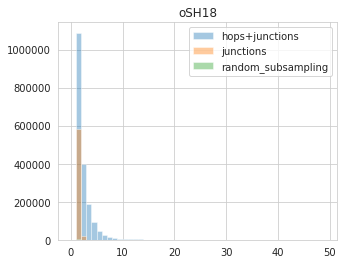

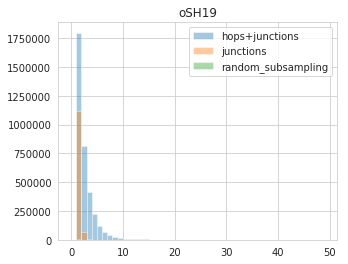

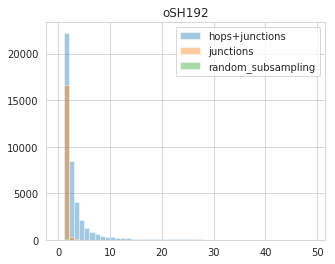

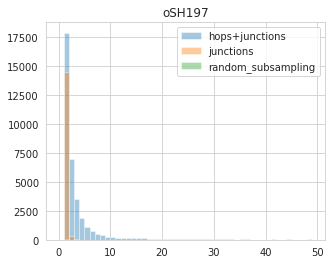

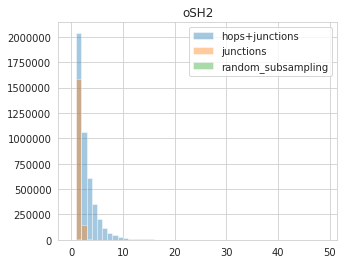

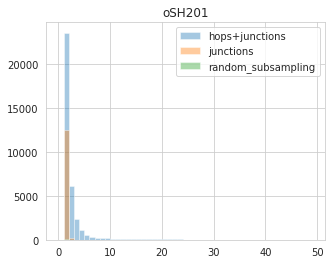

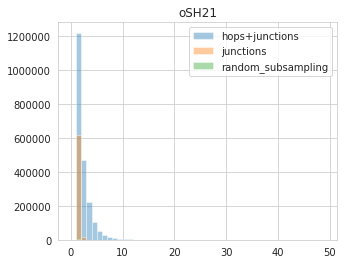

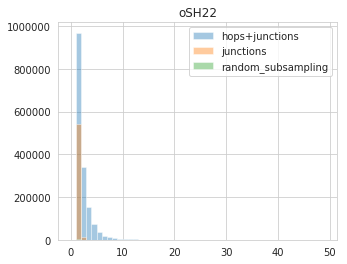

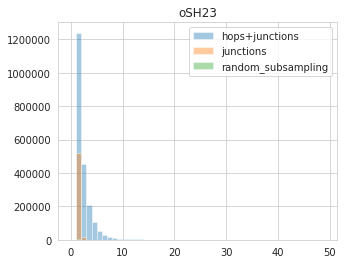

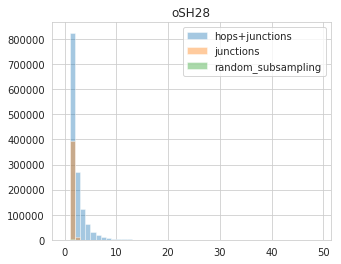

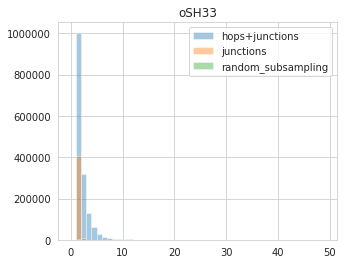

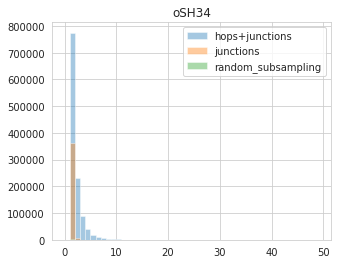

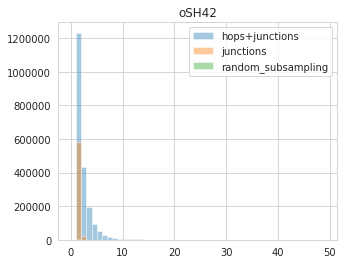

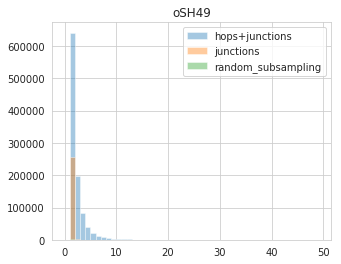

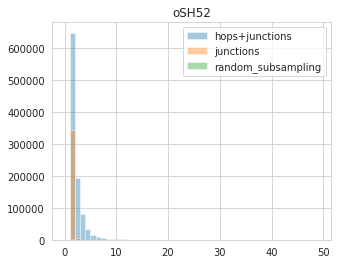

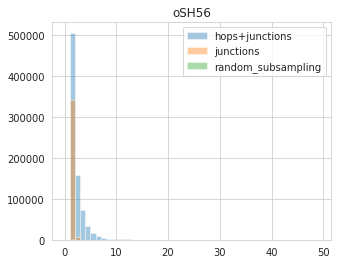

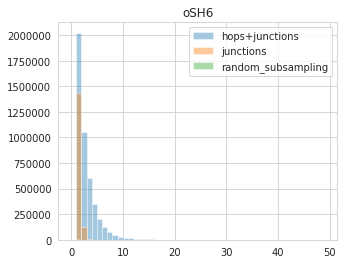

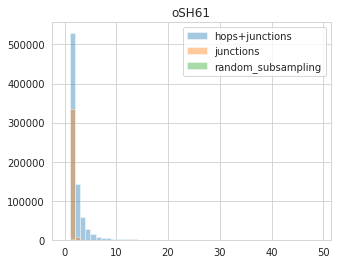

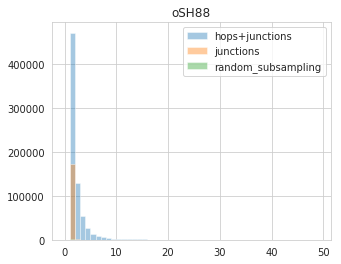

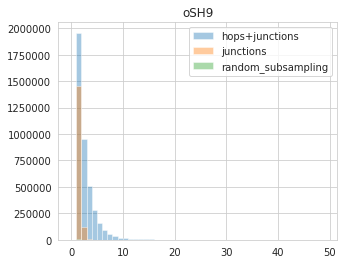

In [22]:
# The same procedure for Flyamer dataset

resolution = 10

PAIR_PATH = "../DATA_FL/PAIR/"
df_total = pd.DataFrame()

for exp in experiment_ids_fl:

    cell = exp
    
    # Reading datasets
    filelist = glob.glob(PAIR_PATH+"{}_*.pairsam.JJ".format(exp))
    exp_list = [x.split('/')[-1].split('.')[0] for x in filelist]
    df = read_pairsams(filelist, exp_list, cell, filter_type='JJ')

    filelist = glob.glob(PAIR_PATH+"{}_*.pairsam.PP".format(exp))
    exp_list = [x.split('/')[-1].split('.')[0] for x in filelist]
    df_PP = read_pairsams(filelist, exp_list, cell, filter_type='PP')

    df_PPJJ = pd.concat([df, df_PP])
    
    #Filtering datasets
    df_filtered, stats = filter_pair_df(df)

    df_f = filter_df_mild(df)
    df_PPJJ_f = filter_df_mild(df_PPJJ)

    
    # Counting distribuions of rfrags
    limit, mode = (None, 'all')
                        
    v_raw = get_counts(df_PPJJ_f, limit=limit)
    v_filt = get_counts(df_f, limit=limit)

    plt.figure(figsize=[5,4])
    sns.distplot(v_raw[v_raw>0], kde=False, bins=np.arange(0,50,1), label='hops+junctions')
    sns.distplot(v_filt[v_filt>0], kde=False, bins=np.arange(0,50,1), label='junctions')

    idx_selected = np.random.choice(np.arange(len(df_PPJJ_f)), len(df_f), replace=False)
    v = get_counts(df_PPJJ_f.iloc[idx_selected,:])
    sns.distplot(v[v>0], kde=False, bins=np.arange(0,50,1), label='random_subsampling')

    plt.legend()
    plt.title(exp)
    plt.savefig("../IMG/QC/1CS_perFragEndDistr_{}_{}.pdf".format(exp, mode))


    df1 = pd.DataFrame(columns=['mode', 'counts', 'rand_mode'])

    v = get_counts(df_PPJJ_f, limit=limit)
    toadd = v[v>0]
    df1_tmp = pd.DataFrame(index=np.arange(len(toadd)), columns=['mode', 'counts', 'rand_mode'])
    df1_tmp.loc[:, 'counts'] = toadd
    df1_tmp.loc[:, 'mode'] = 'junctions+hops'
    df1_tmp.loc[:, 'randmode'] = 'real'
    df1 = pd.concat([df1, df1_tmp])

    v = get_counts(df_f, limit=limit)
    toadd = v[v>0]
    df1_tmp = pd.DataFrame(index=np.arange(len(toadd)), columns=['mode', 'counts', 'rand_mode'])
    df1_tmp.loc[:, 'counts'] = toadd
    df1_tmp.loc[:, 'mode'] = 'junctions'
    df1_tmp.loc[:, 'randmode'] = 'real'
    df1 = pd.concat([df1, df1_tmp])

    for i in range(10):
        idx_selected = np.random.choice(np.arange(len(df_PPJJ_f)), len(df_f), replace=False)
        v = get_counts(df_PPJJ_f.iloc[idx_selected,:])

        toadd = v[v>0]
        df1_tmp = pd.DataFrame(index=np.arange(len(toadd)), columns=['mode', 'counts', 'rand_mode'])
        df1_tmp.loc[:, 'counts'] = toadd
        df1_tmp.loc[:, 'mode'] = 'random_{}'.format(i)
        df1_tmp.loc[:, 'randmode'] = 'random'
        df1 = pd.concat([df1, df1_tmp])

        df1 = pd.concat([df1, df1_tmp])

    df1.counts = pd.to_numeric(df1.counts)

    df_stats = df1.groupby('mode').apply(calculate_stats).reset_index()
    df_stats.loc['limit_mode'] = mode
    df_stats.loc['exp'] = exp

    df_total = pd.concat([df_total, df_stats])

df_total.to_csv("../TABLES/1DS_collected_stats_Flyamer.csv")

## Heatmaps: visualization and testing for randomness

In [5]:
MASK_COOL = "../DATA/COOL/{exp}.{res}.cool"
MASK_COOL_RAND = "../DATA_SHUF/COOL/{exp}.rand.0.{res}.cool"
MASK_COOL_DROS_SUB = "../DATA_DROS_SUBSAMPLE/COOL/Dros.{exp}.{res}.cool.0"

In [9]:
resolution = 10

dataset = {}

balance = False
for exp in experiment_ids_selected:
    l = "{}".format(exp)
    dataset[l] = {}
    f = MASK_COOL.format(exp=exp, res=resolution)
    c = cooler.Cooler(f)
    for chrom in c.chromnames:
        mtx = c.matrix(balance=balance).fetch('{0}'.format(chrom))
        dataset[l][chrom] = mtx.copy()
        
for exp in experiment_ids_selected:
    l = "{}_shuf".format(exp)
    dataset[l] = {}
    f = MASK_COOL_RAND.format(exp=exp, res=resolution)
    try:
        c = cooler.Cooler(f)
        for chrom in c.chromnames:
            mtx = c.matrix(balance=balance).fetch('{0}'.format(chrom))
            dataset[l][chrom] = mtx.copy()
    except Exception as e:
        print(exp, e)
        
for exp in experiment_ids_selected:
    l = "{}_sampled".format(exp)
    dataset[l] = {}
    f = MASK_COOL_DROS_SUB.format(exp=exp, res=resolution)
    c = cooler.Cooler(f)
    for chrom in c.chromnames:
        mtx = c.matrix(balance=balance).fetch('{0}'.format(chrom))
        dataset[l][chrom] = mtx.copy()

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/agalicina/anaconda3/envs/sci-python3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 2.050000


([], <a list of 0 Text yticklabel objects>)

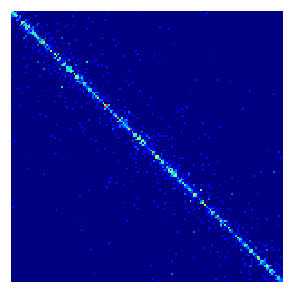

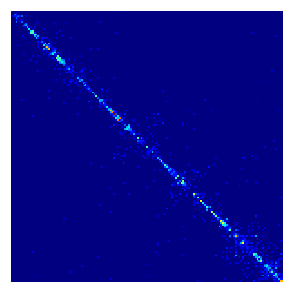

In [10]:
plt.figure(figsize=[5,5])
mtx = dataset['A6_shuf']['chr2L'][0:150,0:150]
sns.heatmap(mtx, square=True, cbar=False, cmap='jet')
plt.xticks([])
plt.yticks([])

plt.figure(figsize=[5,5])
mtx = dataset['A6']['chr2L'][0:150,0:150]
sns.heatmap(mtx, square=True, cbar=False, cmap='jet')
plt.xticks([])
plt.yticks([])

In [11]:
dataset_convolved = {}
windows = [5, 10, 15, 25]

for k in list(dataset.keys()):
    print(k)
    chrms = list(dataset[k].keys())
    dataset_convolved[k] = {}
    for ch in chrms:
        print(k, ch)
        mtx = dataset[k][ch].copy()
        np.fill_diagonal(mtx, 0)
        dataset_convolved[k][ch] = {}
        for window_size in windows: #np.arange(1, 1000, 5):
            print(window_size)
            mtx_conv = scipy.signal.convolve2d(np.triu(mtx), np.ones([window_size, window_size],dtype=int), 'valid')
            dataset_convolved[k][ch][window_size] = mtx_conv

A6
A6 chr2L
5
10
15
25
A6 chr2R
5
10
15
25
A6 chr3L
5
10
15
25
A6 chr3R
5
10
15
25
A6 chr4
5
10
15
25
A6 chrX
5
10
15
25
A6 chrM
5
10
15
25
B31
B31 chr2L
5
10
15
25
B31 chr2R
5
10
15
25
B31 chr3L
5
10
15
25
B31 chr3R
5
10
15
25
B31 chr4
5
10
15
25
B31 chrX
5
10
15
25
B31 chrM
5
10
15
25
A8
A8 chr2L
5
10
15
25
A8 chr2R
5
10
15
25
A8 chr3L
5
10
15
25
A8 chr3R
5
10
15
25
A8 chr4
5
10
15
25
A8 chrX
5
10
15
25
A8 chrM
5
10
15
25
A5
A5 chr2L
5
10
15
25
A5 chr2R
5
10
15
25
A5 chr3L
5
10
15
25
A5 chr3R
5
10
15
25
A5 chr4
5
10
15
25
A5 chrX
5
10
15
25
A5 chrM
5
10
15
25
sc23
sc23 chr2L
5
10
15
25
sc23 chr2R
5
10
15
25
sc23 chr3L
5
10
15
25
sc23 chr3R
5
10
15
25
sc23 chr4
5
10
15
25
sc23 chrX
5
10
15
25
sc23 chrM
5
10
15
25
B26
B26 chr2L
5
10
15
25
B26 chr2R
5
10
15
25
B26 chr3L
5
10
15
25
B26 chr3R
5
10
15
25
B26 chr4
5
10
15
25
B26 chrX
5
10
15
25
B26 chrM
5
10
15
25
B19
B19 chr2L
5
10
15
25
B19 chr2R
5
10
15
25
B19 chr3L
5
10
15
25
B19 chr3R
5
10
15
25
B19 chr4
5
10
15
25
B19 chrX
5
10
15
25


In [12]:
from scipy.optimize import minimize
from scipy.special import factorial

def poisson(k, lamb):
    """poisson pdf, parameter lamb is the fit parameter (lambda)"""
    return (lamb**k/factorial(k)) * np.exp(-lamb)

def negLogLikelihood(params, data):
    """ the negative log-Likelohood-Function"""
    lnl = - np.sum(np.log(poisson(data, params[0])))
    return lnl

In [ ]:
chrms

In [13]:
for window_size in [5, 10, 15, 25]:
    for distance in [0, 5, 10]:
        for exp in experiment_ids_selected:
                try:
                    
                    v = {}
                    for mode in ['', '_shuf', '_sampled']:
                        data = []
                        for ch in ['chr2L', 'chr2R', 'chr3L', 'chr3R']:
                            data += dataset_convolved["{}{}".format(exp, mode)][ch][window_size].diagonal(distance)
                        data = np.concatenate(data)
                        v["{}{}".format(exp, mode)] = data
                    
                    mx = np.max(np.concatenate([v[exp], v[exp+'_shuf'], v[exp+'_sampled']]))+1
                    bins = np.arange(mx)
                    
                    plt.figure(figsize=[7,5])
                    x_plot = np.linspace(0, mx, 1000)
                    
                    for mode, label, col in [("", "Single cell map", 'blue'),
                                       ("_shuf", "Shuffled map", 'red'),
                                       ("_sampled", "Population subsampling", 'green')]:
                        data = v["{}{}".format(exp, mode)]
                        # minimize the negative log-Likelihood: function to min, start param value, additional args, minimization method
                        result = minimize(negLogLikelihood, x0=np.zeros(1), args=(data,), method='Powell')
                        logL = -result.fun
                        SSE = np.nansum( np.square(poisson(bins, result.x)[:-1]-np.histogram(data, bins=bins)[0]/len(data)) )

                        plt.hist(data, bins=bins-0.5, density=True, color=col, alpha=0.2)
                        plt.plot(x_plot, poisson(x_plot, result.x), 'r-', lw=1, color=col, alpha=0.7,
                          label="{label}, lambda {l:.2f}, SSE {sse:.3f}, logL {logl:.2f}".format(label=label, l=result.x, sse=SSE, logl=logL))

                    plt.legend()
                    plt.xlim(0, mx)

                    title_params = {'window_size': window_size, 'distance': distance, 'exp': exp, 'ch': ch}
                    plt.title("LogLikelihood optimisation of Poisson fit to window counts\n{exp} Window: {window_size} Distance: {distance}".format(**title_params))
                    plt.savefig('../IMG/QC/2A_PoissonApprox_{exp}_{window_size}_{distance}.pdf'.format(**title_params))
                
                except Exception as e:
                    print(exp, window_size, distance, ch, e)

A6 5 0 chr2L operands could not be broadcast together with shapes (0,) (2298,) 
B31 5 0 chr2L operands could not be broadcast together with shapes (0,) (2298,) 
A8 5 0 chr2L operands could not be broadcast together with shapes (0,) (2298,) 
A5 5 0 chr2L operands could not be broadcast together with shapes (0,) (2298,) 
sc23 5 0 chr2L operands could not be broadcast together with shapes (0,) (2298,) 
B26 5 0 chr2L operands could not be broadcast together with shapes (0,) (2298,) 
B19 5 0 chr2L operands could not be broadcast together with shapes (0,) (2298,) 
B16 5 0 chr2L operands could not be broadcast together with shapes (0,) (2298,) 
sc16 5 0 chr2L operands could not be broadcast together with shapes (0,) (2298,) 
B3 5 0 chr2L operands could not be broadcast together with shapes (0,) (2298,) 
A2 5 0 chr2L operands could not be broadcast together with shapes (0,) (2298,) 
A3 5 0 chr2L operands could not be broadcast together with shapes (0,) (2298,) 
sc1 5 0 chr2L operands could not

### Ripley K function with spatstat module

In [171]:
%R library(spatstat)

/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: spatstat.data

  warnings.warn(x, RRuntimeWarning)
/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: nlme

  warnings.warn(x, RRuntimeWarning)
/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: rpart

  warnings.warn(x, RRuntimeWarning)
/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
spatstat 1.57-1       (nickname: ‘Cartoon Physics’) 
For an introduction to spatstat, type ‘beginner’ 


  warnings.warn(x, RRuntimeWarning)
/home/agalicina/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Not

array(['spatstat', 'rpart', 'nlme', 'spatstat.data', 'ggplot2', 'tools',
       'stats', 'graphics', 'grDevices', 'utils', 'datasets', 'methods',
       'base'], dtype='<U13')

In [380]:
df = pd.read_csv('../../examples_single_cell_2018/DATA_SHUF/TXT/SPARSE/sparse_bins.A6.10.chr2L.txt', sep='\t')
x = df.bin1_id.values
y = df.bin2_id.values
x, y = np.concatenate([x,y]), np.concatenate([y,x])

df = pd.read_csv('../../examples_single_cell_2018/DATA/TXT/SPARSE/sparse_bins.A6.10.chr2L.txt', sep=',')
x1 = df.bin1_id.values
y1 = df.bin2_id.values
x1, y1 = np.concatenate([x1,y1]), np.concatenate([y1,x1])


mask = (np.abs(x-y)>0) #& (x>1000) #& (y<1500)
x = x[mask]
y = y[mask]

wx = np.array([min(x), max(x)])
wy = np.array([min(y), max(y)])

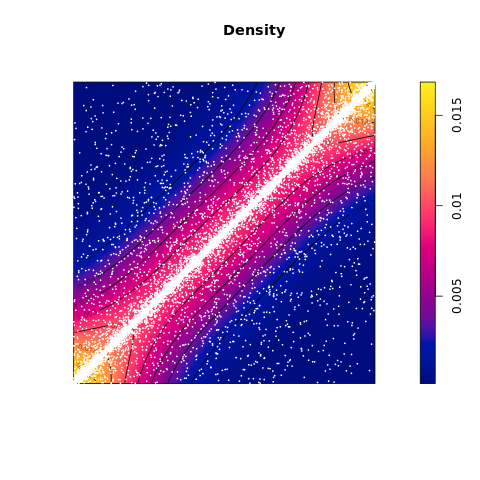

In [381]:
%%R -i x -i y -i wx -i wy
X <- ppp(c(x), c(y), window=owin(xrange=c(wx), yrange=c(wy)))
X.den <- density(X)
plot(X.den, main="Density")
contour(X.den, add=T)
points(X, pch=20, cex=0.001, col='white')

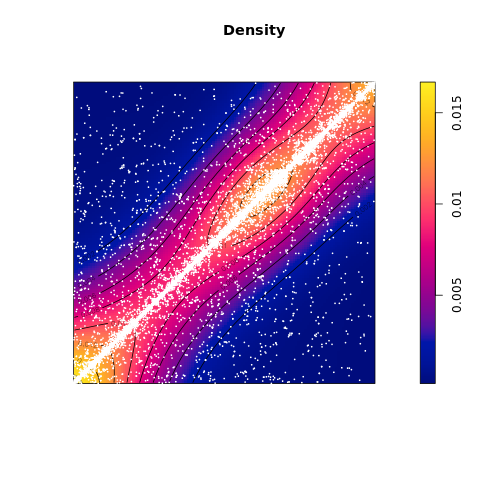

In [382]:
%%R -i x1 -i y1 -i wx -i wy
x = x1
y = y1
X <- ppp(c(x), c(y), window=owin(xrange=c(wx), yrange=c(wy)))
X.den <- density(X)
plot(X.den, main="Density")
contour(X.den, add=T)
points(X, pch=20, cex=0.001, col='white')

In [385]:
%%R -i x -i y -i wx -i wy -i x1 -i y1

X <- ppp(c(x), c(y), window=owin(xrange=c(wx), yrange=c(wy)))
K <- Kest(X, correction="all")
X1 <- ppp(c(x1), c(y1), window=owin(xrange=c(wx), yrange=c(wy)))
K1 <- Kest(X1, correction="all")

#plot(K, main="K function for cells")
#par(new=TRUE)
#plot(K1, main="K function for cells", add=True)

#X <- runifpoint(50)
#print(X)
#K <- Kest(X, rmax=20)
#E <- envelope(Y = X, fun = Kest, nsim = 20, correction='all', rmax=20)
# plot(K)
# plot the L function
# plot(K, sqrt(iso/pi) ~ r)
#plot(K, sqrt(./pi) ~ r, ylab="L(r)", main="L function for cells")

Function value object (class ‘fv’)
for the function r -> K(r)
........................................................................
           Math.label       Description                                 
r          r                distance argument r                         
theo       K[pois](r)       theoretical Poisson K(r)                    
un         hat(K)[un](r)    uncorrected estimate of K(r)                
bord.modif hat(K)[bordm](r) modified border-corrected estimate of K(r)  
border     hat(K)[bord](r)  border-corrected estimate of K(r)           
trans      hat(K)[trans](r) translation-corrected estimate of K(r)      
rigid      hat(K)[rigid](r) rigid motion-corrected estimate of K(r)     
iso        hat(K)[iso](r)   Ripley isotropic correction estimate of K(r)
........................................................................
Default plot formula:  .~r
where “.” stands for ‘iso’, ‘rigid’, ‘trans’, ‘border’, 
‘bord.modif’, ‘un’, ‘theo’
Recommended range of arg

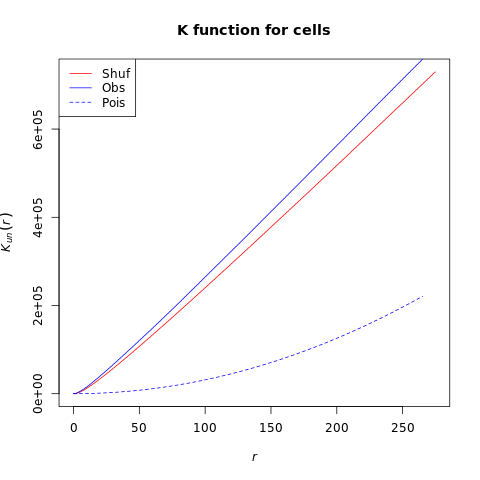

In [386]:
%%R
print(K)
plot(K, un ~ r, main="K function for cells", col='red')
plot(K1, un ~ r, col='blue', add=TRUE)
plot(K1, theo ~ r, col='blue', add=TRUE, lty=2)
legend("topleft", legend=c('Shuf', 'Obs', "Pois"), col=c('red', 'blue', 'blue'), lty=c(1, 1, 2))
#par(new=TRUE)
#plot(K1, main="K function for cells", add=TRUE)